Physics I Python Lab 1

Michael Culotta

03/20/2025

#   <font color='Red'> **Import Necessary Modules** </font>

In [3]:
import numpy as np
from numpy.linalg import norm
from numpy import array, sqrt, zeros, arange
import matplotlib.pyplot as plt

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

### <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

### <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [4]:
Δt = 0.01 ### s(detector)
t0 = 0 # s
tf = 10 # s

dt       = Δt
timeline = arange(t0, tf, Δt)

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'> To begin lets start with by defining an initial position. </font>

In [5]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array

### <font color='Red'> PRINT the distance of the previously defined position vector (give units!): </font>

In [6]:
distance = norm(x_0)

print("the initial distance is %4.3f meters "  % distance)

the initial distance is 1.000 meters 


### <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t. </font>

In [7]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
for t in range(1,len(timeline)):
    x_t[t] = x_t[t-1] + v_t[t-1] * Δt ## numerically integrate the velocity
    v_t[t] = v_t[t-1] ## set new velocity = old velocity (because constant velocity)

### <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

In [8]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory


### <font color='Red'> Make 2 plots of with: x_t and \{v_t, dxdt_t\} in matplotlib, both as a function of time. Make sure to include all LABELS!. </font>

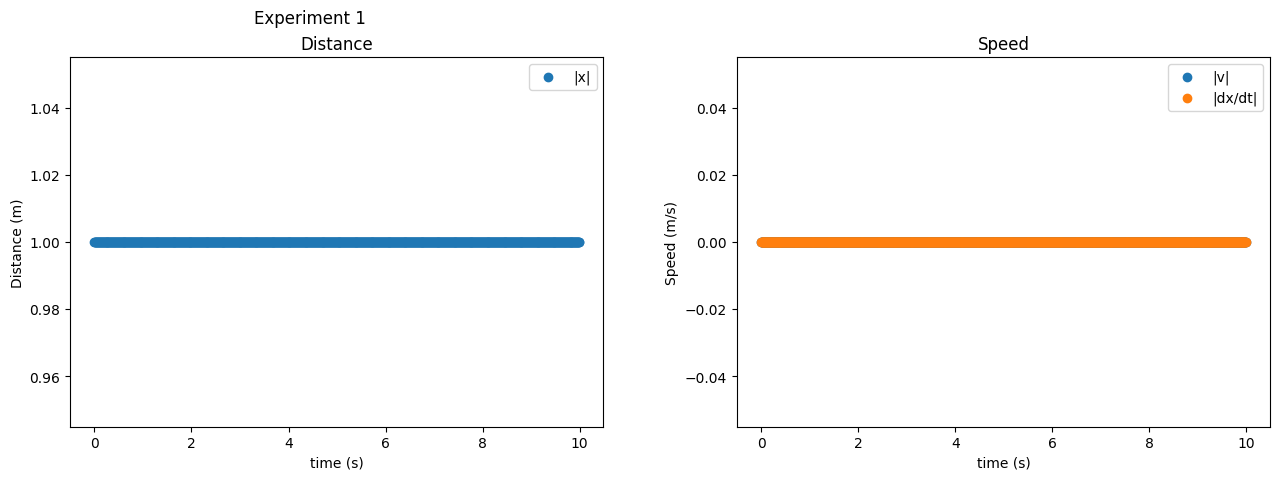

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distance (m)")

ax2.scatter(timeline, norm(v_t, axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")
fig.show()

The plots above show that the distance or displacement of a simulated object remains the same given a constant zero initial velocity. These plots, when combined, confirm Newtons first law of motion that an object at rest remains at rest unless acted upon by an outside force.

#   <font color='Red'> **Experiment 2** </font>

### <font color='Red'> To begin lets start with by defining an initial position and velocity </font>

In [23]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array
v_0 = array([1., 0., 0.]) ## m/s : initial velocity vector/array

### <font color='Red'> PRINT out the distance and speed of the previously defined position and velocity vectors: </font>

In [24]:
distance = norm(x_0)
speed    = norm(v_0)

print("the initial distance is %4.3f meters "  % distance )
print("the initial speed    is %4.3f meters/second "  % speed )

the initial distance is 1.000 meters 
the initial speed    is 1.000 meters/second 


### <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t. </font>

In [25]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt ## numerically integrate the velocity
  v_t[t] = v_t[t-1] ## set new velocity = old velocity (because constant velocity)

### <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

### <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>



In [26]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory

### <font color='Red'> Calculate the Average Velocity over time, v_t. </font>

In [27]:
np.sum(v_t, axis=0)/(len(v_t))

array([1., 0., 0.])

### <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and dvdt_t in matplotlib, both as a function of time. Make sure to include all LABELS!. </font>

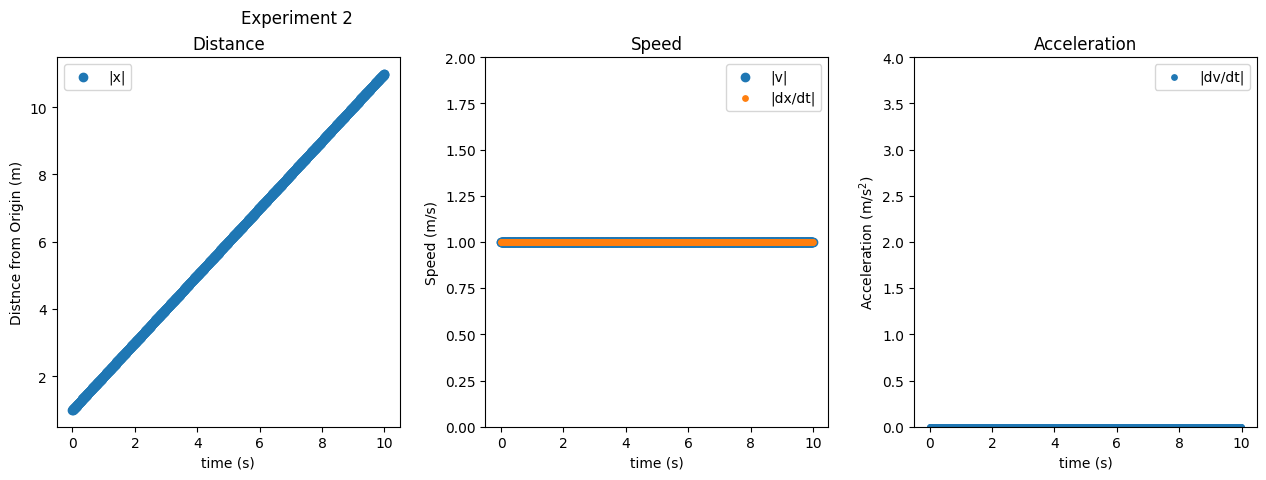

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment 2")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce from Origin (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.set_ylim([0, 2])
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 4])
ax3.set_title("Acceleration")
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")
ax3.legend()
fig.show()

The plots above show that the position of an object with constant velocity will increases linearly with time. The linear increase in position (in this case with a slope of 1) indicates that the velocity is constant (value of 1) and further that we should have zero acceleration.

#   <font color='Red'> **Experiment 3** </font>

###  <font color='Red'> To begin lets start with by defining an initial position, velocity, and acceleration </font>

In [34]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array
v_0 = array([1., 0., 0.]) ## m/s : initial velocity vector/array
a_0 = array([2., 0., 0.]) ## m/s/s : initial acceleration vector/array

###  <font color='Red'> PRINT out the distance, speed, and magnitude of the acceleration of the previously defined vectors: </font>

In [35]:
distance     = norm(x_0)
speed        = norm(v_0)
acceleration = norm(a_0)

print("the initial distance     is %4.3f meters "  % distance)
print("the initial speed        is %4.3f meters/second "  % speed)
print("the initial acceleration is %4.3f meters/second/second "  % acceleration)

the initial distance     is 1.000 meters 
the initial speed        is 1.000 meters/second 
the initial acceleration is 2.000 meters/second/second 


###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [36]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(timeline), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = a_0 ## initialize the 0th acceleration-trajectory entry to the initial-acceleration
for t in range(1,len(x_t)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = a_t[t-1] ## Velocity-Verlet Step 2 : find new acceleraiton from old acceleraiton
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

###  <font color='Red'> Take a time-derivative of a_t to obtain dadt_t. </font>

In [37]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory
dadt_t = d(a_t)/dt ## take numerical-derivative of the aforementioned acceleration-trajectory

###  <font color='Red'> Make 4 plots of with: x_t, \{v_t, dxdt_t\}, \{ a_t, dvdt_t\}, and dadt_t in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

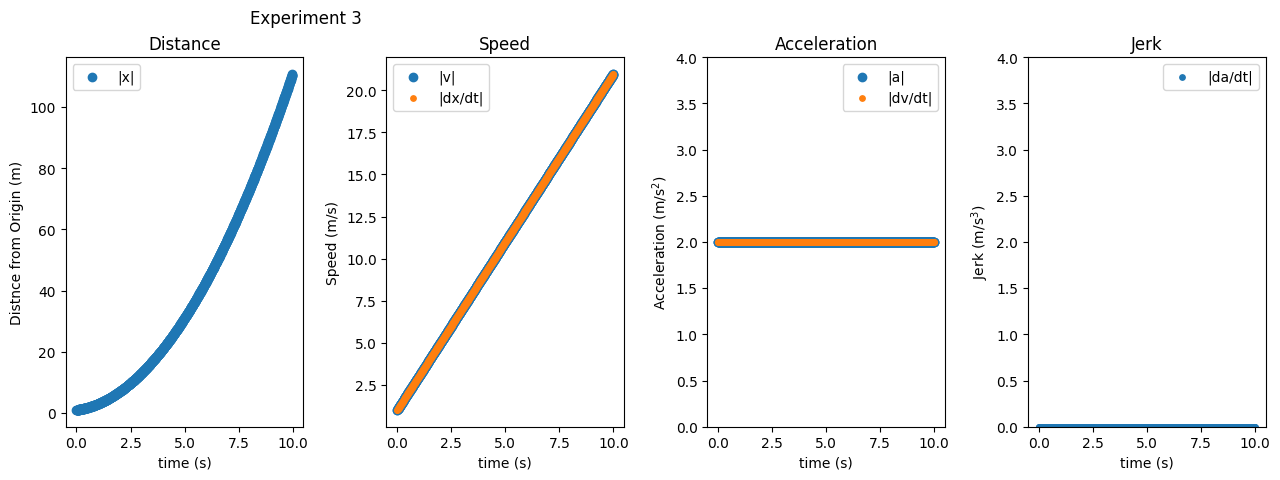

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Experiment 3")
fig.subplots_adjust(hspace=0.01, wspace=0.35, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce from Origin (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 4])
ax3.set_title("Acceleration")
ax3.legend()
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")

ax4.scatter(timeline, norm(dadt_t, axis=1), s=15, label="|da/dt|")
ax4.set_ylim([0, 4])
ax4.set_title("Jerk")
ax4.set(xlabel="time (s)", ylabel="Jerk (m/s$^3$)")
ax4.legend()
fig.show()

The plots above show that the distance or displacement of the simulated object increases as a quadratic with respect to time. This quadratic increase indicates that the velocity is linear and further that the acceleration is constant. These assumptions are confirmed in the plots as we see a constant acceleration of 2 throughout the duration of the experiment, a linearly increasing velocity, and a quadratic position. Futher, given a constant acceleration we can expect to have zero jerk.

#   <font color='Red'> **Experiment 4** </font>

###   <font color='Red'> To begin lets start given the following initial position, velocity, and acceleration, WITH velocity and acceleration in different directions! </font>

In [30]:
x_0 = array([10., 0., 0.]) ## m : initial position vector/array
v_0 = array([50., 0., 0.]) ## m/s : initial velocity vector/array
a_0 = array([-9.81,0., 0.]) ## m/s/s : initial acceleration vector/array

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [31]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(timeline), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = a_0 ## initialize the 0th acceleration-trajectory entry to the initial-acceleration
for t in range(1,len(x_t)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = a_t[t-1] ## Velocity-Verlet Step 2 : find new acceleraiton from old acceleraiton
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

###  <font color='Red'> Take a time-derivative of a_t to obtain dadt_t. </font>

In [32]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory
dadt_t = d(a_t)/dt ## take numerical-derivative of the aforementioned acceleration-trajectory

###  <font color='Red'> Make 4 plots of with: x_t, \{v_t, dxdt_t\}, \{ a_t, dvdt_t\}, and dadt_t in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

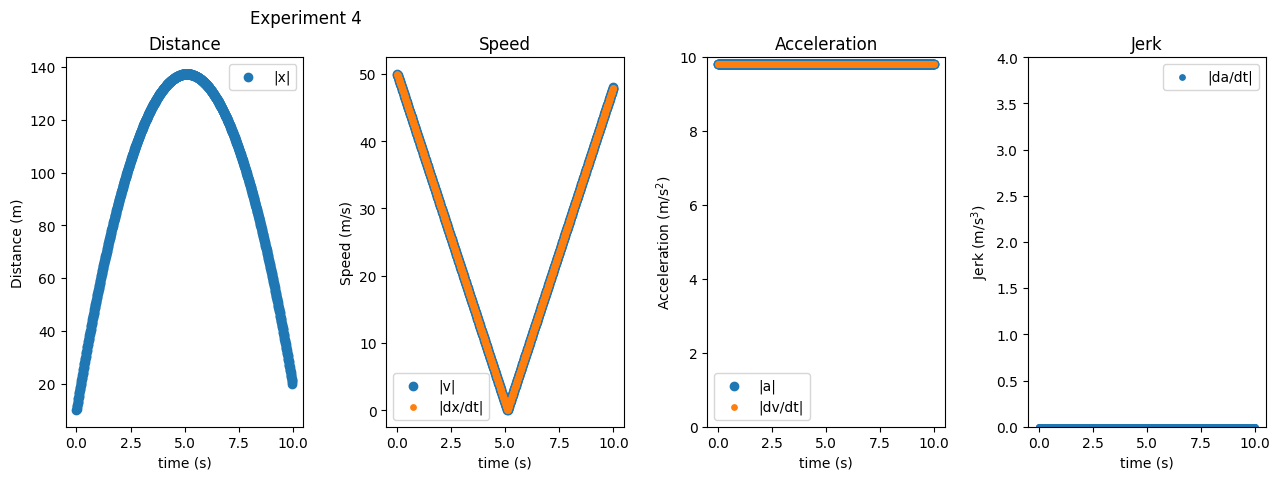

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Experiment 4")
fig.subplots_adjust(hspace=0.05, wspace=0.35, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distance (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 10])
ax3.set_title("Acceleration")
ax3.legend()
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")

ax4.scatter(timeline, norm(dadt_t, axis=1), s=15, label="|da/dt|")
ax4.set_ylim([0, 4])
ax4.set_title("Jerk")
ax4.legend()
ax4.set(xlabel="time (s)", ylabel="Jerk (m/s$^3$)")
ax4.legend()
fig.show()

The plots above show the trajectory, or position, of a simulated object given the influence due to gravity. The upside down parabola indicates that the velocity is not constant but changes with respect to the slope of the tangent line to the parabola. The velocity plot is in the shape of a V because we take the absolute value of the velocity in our code. The reason for this is to prevent from having negative speed. If we do not take the absolute value we would see a negatively sloped linear function which at the objects apex would switch from positive to negative, in this case t=5. By not taking the absolute value we can more intuitevly see the constant acceleration due to gravity. Since acceleration is constant we have zero jerk. 

#   <font color='Red'> **Conclusion** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

In this lab we are introduced to motion and its components. Motion can be described primarily through position, velocity, and acceleration components. Examining how each changes through time can tell us how an object travels through space. Acceleration is defined as the change in velocity over time. Velocity is defined as the change in position over time. The change in position over time shows us the trajectory of an object. Constant acceleration implies that the velocity is linear and that position is quadratic. In experiment 1 we start with simple initial and begin to see graphically how velocity and position are related. In experiment 2 we see what a constant non-zero velocity implies for position. In experiment 3 we see what constant acceleration implies for velocity and position. Finally, in experiment 4 we see how constant acceleration due to gravity affects velocity and position with respect to time.

Mathamatically inertia can be represented by:
 Δv=0, then a= Δv/Δt = 0, then v(t)= v(t')
 with t' being a later point in time. If velocity is equal to some value and we assume no perturbations/accelerations, then for some later time, t', the velocity will be the same.

The Velocity-Verlet Integrator is used to iteratively calculate future velocities and displacements by knowing the initial constant acceleration.